# A New Perspective

## The Challenge
Due to the COVID-19 pandemic, protected areas and other forms of wilderness areas (e.g., arboretums, beaches, parks, marine monuments) have been closed worldwide. Your challenge is to lead the effort to examine any potential impacts of reduced human traffic in such local protected natural environments.

## Abstract
For this challange I conducted a small research into conequences of covid curfew in Rio coast region. I sampled data from satallite sensors that make observations of ocean surface. Then I compared this year data to data from last year observations to eleminate seasonal trend changes and figure out what impact did the covid curfew have on environment of this particular area.

## NASA Datasets
In this research, Aqua MODIS sensor data was used (such as chlorophyll concentration, aerosol optical thickness and reflectance on different wave length) https://oceancolor.gsfc.nasa.gov/l3/ for Rio coast region: 
![](rio.png)

## Why this particular area?
Rio coast region has one of the most famous beaches in the world: Capacabana and Ipanema. After Rio Gov. Wilson Witzel declared a city-wide state of emergency on March 17 they became deserted. The change in human behavior is clearly defined. The purpose of this research is to track how these changes translate into satallite ocean data and more importantly - estimate it's effect.
#### A composite image of Copacabana beach in Rio before and after the coronavirus.
![](compare)
image source: https://www.insider.com/before-after-photos-rio-beaches-deserted-2020-4

Another reason why this region is of particular interest is that coastal Brasil is a significant source of plastic in the ocean. So the change is expecated to be tangible.
![](plastic.png)
image source: https://ensia.com/photos/plastics-impact-worlds-oceans-outlined-8-maps/

## Diving into data with python

In [299]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta
import math
import numpy as np
import random

In [185]:
def convert_to_date(fname):
    days = int(fname.split('.')[0][-3:])
    date = datetime(2020, 1, 1) + timedelta(days - 1)
    return date

convert_to_date('A2020038.L3m_DAY_RRS.x_aot_869.nc')

datetime.datetime(2020, 2, 7, 0, 0)

## Aerosol optical thickness
Aerosol Optical Thickness is the degree to which aerosols prevent the transmission of light in the atmoshpere. An aerosol optical thickness of less than 0.1 indicates a crystal clear sky with maximum visibility, whereas a value of 4 indicates the presence of aerosols so dense that people would have difficulty seeing the Sun, even at mid-day! 
Aerosol optical thickness data is commonly used to estimate air quality.
Aerosol particles are important to scientists because they represent an area of great uncertainty in their efforts to understand Earth's climate system. Depending upon their size, type, and location, aerosols can either cool the surface, or warm it. They can help clouds to form, or they can inhibit cloud formation. And if inhaled, aerosols can be harmful to people's health.

source: https://serc.carleton.edu/usingdata/datasheets/aerosolopticalthick.html

## Plotting data samples from 2020

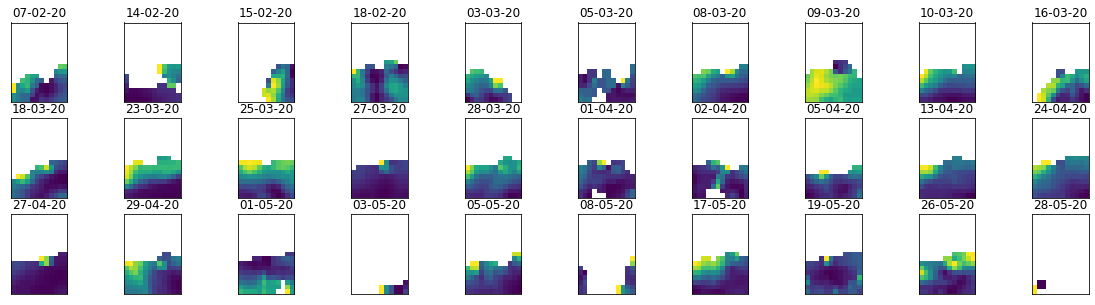

In [491]:
N = 30
fig, axs = plt.subplots(math.ceil(N / 10), 10, figsize=(20, 5))
variable = 'aot_869'
data_path = 'data/oceancolor/copacabana'
files = sorted(random.sample([f for f in os.listdir(data_path) if '2020' in f and variable in f], N))
for i, fname in enumerate(files):
    date = convert_to_date(fname)
    nc_dataset = Dataset(os.path.join(data_path, fname), 'r')
    data = nc_dataset.variables[variable][:]
    x, y = i // 10, i - (i // 10) * 10
    axs[x, y].imshow(data)
    axs[x, y].set_title(date.strftime('%d-%m-%y'))
    axs[x, y].set_xticks([])
    axs[x, y].set_yticks([])
    
# plt.subplots_adjust(top=0.5)
plt.show()

### Retrieving daily data for years 2020 and 2019:

In [492]:
dates_2020 = []
means_2020 = []

files = sorted([f for f in os.listdir(data_path) if '2020' in f and variable in f])
for i, fname in enumerate(files):
    date = convert_to_date(fname)
    dates_2020.append(date)
    nc_dataset = Dataset(os.path.join(data_path, fname), 'r')
    data = nc_dataset.variables[variable][:]
    means_2020.append(data.mean())
rolling_means_2020 = [np.mean(means_2020[i-5:i+5]) for i in range(5, len(means_2020) - 5)]

dates_2019 = []
means_2019 = []

files = sorted([f for f in os.listdir(data_path) if '2019' in f and variable in f])
for i, fname in enumerate(files):
    date = convert_to_date(fname)
    dates_2019.append(date)
    nc_dataset = Dataset(os.path.join(data_path, fname), 'r')
    data = nc_dataset.variables[variable][:]
    means_2019.append(data.mean())

rolling_means_2019 = [np.mean(means_2019[i-5:i+5]) for i in range(5, len(means_2019) - 5)]

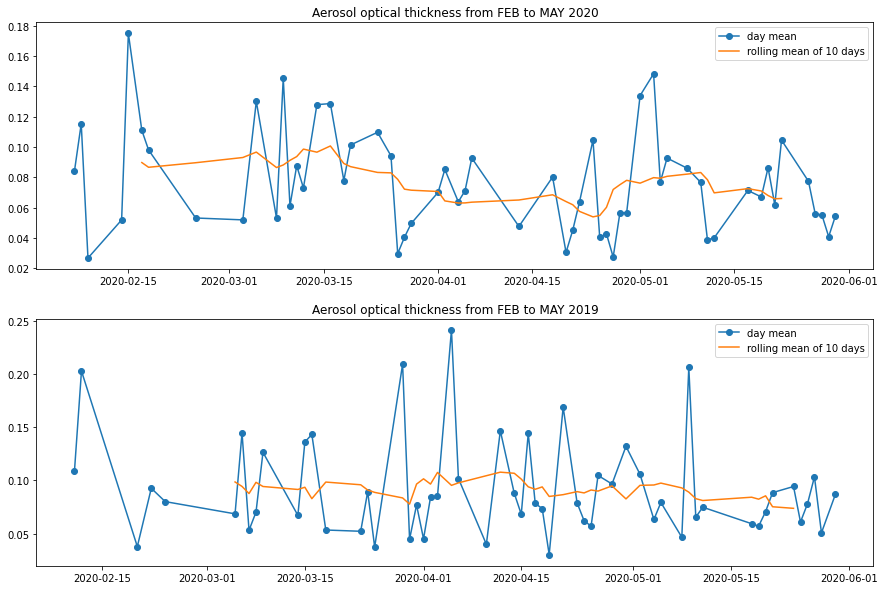

In [495]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

rolling_means_2020 = [np.mean(means_2020[i-5:i+5]) for i in range(5, len(means_2020) - 5)]
ax1.set_title('{} from FEB to MAY 2020'.format('Aerosol optical thickness'))
ax1.plot(dates_2020, means_2020, '-o', label='day mean')
ax1.plot(dates_2020[5:-5], rolling_means_2020, label='rolling mean of 10 days')
ax1.legend()

rolling_means_2019 = [np.mean(means_2019[i-5:i+5]) for i in range(5, len(means_2019) - 5)]
ax2.set_title('{} from FEB to MAY 2019'.format('Aerosol optical thickness'))
ax2.plot(dates_2019, means_2019, '-o', label='day mean')
ax2.plot(dates_2019[5:-5], rolling_means_2019, label='rolling mean of 10 days')
ax2.legend()

plt.show()

In [489]:
print('min rolling mean 2020: {:.04f}, min rolling mean 2019: {:0.4f}'.format(min(rolling_means_2020), min(rolling_means_2019)))
print('median rolling mean 2020: {:.04f}, median rolling mean 2019: {:0.4f}'.format(np.median(rolling_means_2020), np.median(rolling_means_2019))) 

min rolling mean 2020: 0.0538, min rolling mean 2019: 0.0737
median rolling mean 2020: 0.0771, median rolling mean 2019: 0.0929


## Reflectance
Reflectance can be used as a characteristic to estimate platic content in ocean water. The higher the plastic content in the water the higher reflectance of water surface should be. 

### Retrieving daily data for years 2020 and 2019:

In [506]:
variable = 'Rrs_412'
data_path = 'data/oceancolor/copacabana'

dates_2020 = []
means_2020 = []

files = sorted([f for f in os.listdir(data_path) if '2020' in f and variable in f])
for i, fname in enumerate(files):
    date = convert_to_date(fname)
    dates_2020.append(date)
    nc_dataset = Dataset(os.path.join(data_path, fname), 'r')
    data = nc_dataset.variables[variable][:]
    means_2020.append(data.mean())
rolling_means_2020 = [np.mean(means_2020[i-5:i+5]) for i in range(5, len(means_2020) - 5)]

dates_2019 = []
means_2019 = []

files = sorted([f for f in os.listdir(data_path) if '2019' in f and variable in f])
for i, fname in enumerate(files):
    date = convert_to_date(fname)
    dates_2019.append(date)
    nc_dataset = Dataset(os.path.join(data_path, fname), 'r')
    data = nc_dataset.variables[variable][:]
    means_2019.append(data.mean())

rolling_means_2019 = [np.mean(means_2019[i-5:i+5]) for i in range(5, len(means_2019) - 5)]

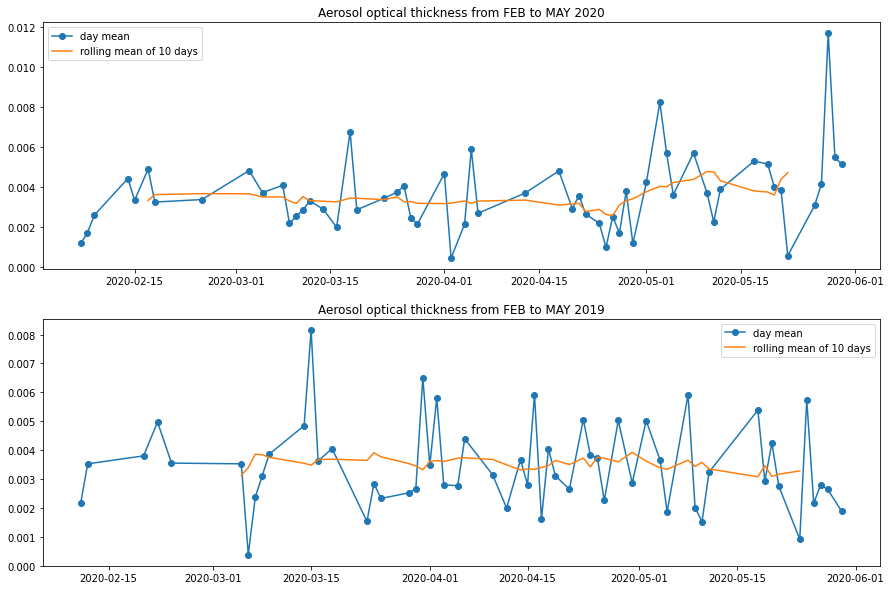

In [507]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

rolling_means_2020 = [np.mean(means_2020[i-5:i+5]) for i in range(5, len(means_2020) - 5)]
ax1.set_title('{} from FEB to MAY 2020'.format('Aerosol optical thickness'))
ax1.plot(dates_2020, means_2020, '-o', label='day mean')
ax1.plot(dates_2020[5:-5], rolling_means_2020, label='rolling mean of 10 days')
ax1.legend()

rolling_means_2019 = [np.mean(means_2019[i-5:i+5]) for i in range(5, len(means_2019) - 5)]
ax2.set_title('{} from FEB to MAY 2019'.format('Aerosol optical thickness'))
ax2.plot(dates_2019, means_2019, '-o', label='day mean')
ax2.plot(dates_2019[5:-5], rolling_means_2019, label='rolling mean of 10 days')
ax2.legend()

plt.show()

In [508]:
print('min rolling mean 2020: {:.04f}, min rolling mean 2019: {:0.4f}'.format(min(rolling_means_2020), min(rolling_means_2019)))
print('median rolling mean 2020: {:.04f}, median rolling mean 2019: {:0.4f}'.format(np.median(rolling_means_2020), np.median(rolling_means_2019))) 

min rolling mean 2020: 0.0026, min rolling mean 2019: 0.0031
median rolling mean 2020: 0.0034, median rolling mean 2019: 0.0035


# Results

Certain decrease in aerosol optical thickness can be observed from this data. This could be due to reduction of waste from factories or reduction of transportation usage. Nevertheless change seem to correspond with the date of city-wide state of emergency.

Reflectance didn't show as much change as I anticipated it to be. Nevertheless certain decrease is still observed. 


Of course any of this findings demand a certain statistical approach to be proven valid. But this is beyond this small work. I hope it will encourage others to use data to help environment by showing that any sources and instruments for a research are really simple and available to anyone.